<a href="https://colab.research.google.com/github/Halima717/Classification/blob/main/image_classification_brain_disorder_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -R /content/drive/MyDrive/data


/content/drive/MyDrive/data:
Testing  Training

/content/drive/MyDrive/data/Testing:
glioma	meningioma  notumor  pituitary

/content/drive/MyDrive/data/Testing/glioma:
Te-gl_0010.jpg	Te-gl_0060.jpg	Te-gl_0110.jpg	Te-gl_0160.jpg	Te-gl_0210.jpg	Te-gl_0260.jpg
Te-gl_0011.jpg	Te-gl_0061.jpg	Te-gl_0111.jpg	Te-gl_0161.jpg	Te-gl_0211.jpg	Te-gl_0261.jpg
Te-gl_0012.jpg	Te-gl_0062.jpg	Te-gl_0112.jpg	Te-gl_0162.jpg	Te-gl_0212.jpg	Te-gl_0262.jpg
Te-gl_0013.jpg	Te-gl_0063.jpg	Te-gl_0113.jpg	Te-gl_0163.jpg	Te-gl_0213.jpg	Te-gl_0263.jpg
Te-gl_0014.jpg	Te-gl_0064.jpg	Te-gl_0114.jpg	Te-gl_0164.jpg	Te-gl_0214.jpg	Te-gl_0264.jpg
Te-gl_0015.jpg	Te-gl_0065.jpg	Te-gl_0115.jpg	Te-gl_0165.jpg	Te-gl_0215.jpg	Te-gl_0265.jpg
Te-gl_0016.jpg	Te-gl_0066.jpg	Te-gl_0116.jpg	Te-gl_0166.jpg	Te-gl_0216.jpg	Te-gl_0266.jpg
Te-gl_0017.jpg	Te-gl_0067.jpg	Te-gl_0117.jpg	Te-gl_0167.jpg	Te-gl_0217.jpg	Te-gl_0267.jpg
Te-gl_0018.jpg	Te-gl_0068.jpg	Te-gl_0118.jpg	Te-gl_0168.jpg	Te-gl_0218.jpg	Te-gl_0268.jpg
Te-gl_0019.jpg	Te-gl_0

In [ ]:
# Define your image dimensions
img_height = 224
img_width = 224
batch_size = 64
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/data/Training',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/data/Testing',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
def display_images_from_generator(generator, num_classes, num_images_per_class=5):
    plt.figure(figsize=(15, 15))

    # Iterate through each class
    for class_index in range(num_classes):
        class_label = generator.class_indices.keys()
        class_name = list(class_label)[class_index]

        # Get a batch of images and labels from the generator
        images, labels = next(generator)
        class_images = [images[i] for i in range(len(labels)) if labels[i] == class_index]

        # Display num_images_per_class images from this class
        for i in range(min(num_images_per_class, len(class_images))):
            plt.subplot(num_classes, num_images_per_class, class_index * num_images_per_class + i + 1)
            plt.imshow(class_images[i].squeeze(), cmap='gray')  # Use 'gray' colormap for grayscale images
            plt.axis('off')
            if i == 0:
                plt.title(class_name)

    plt.tight_layout()
    plt.show()

Training Images:


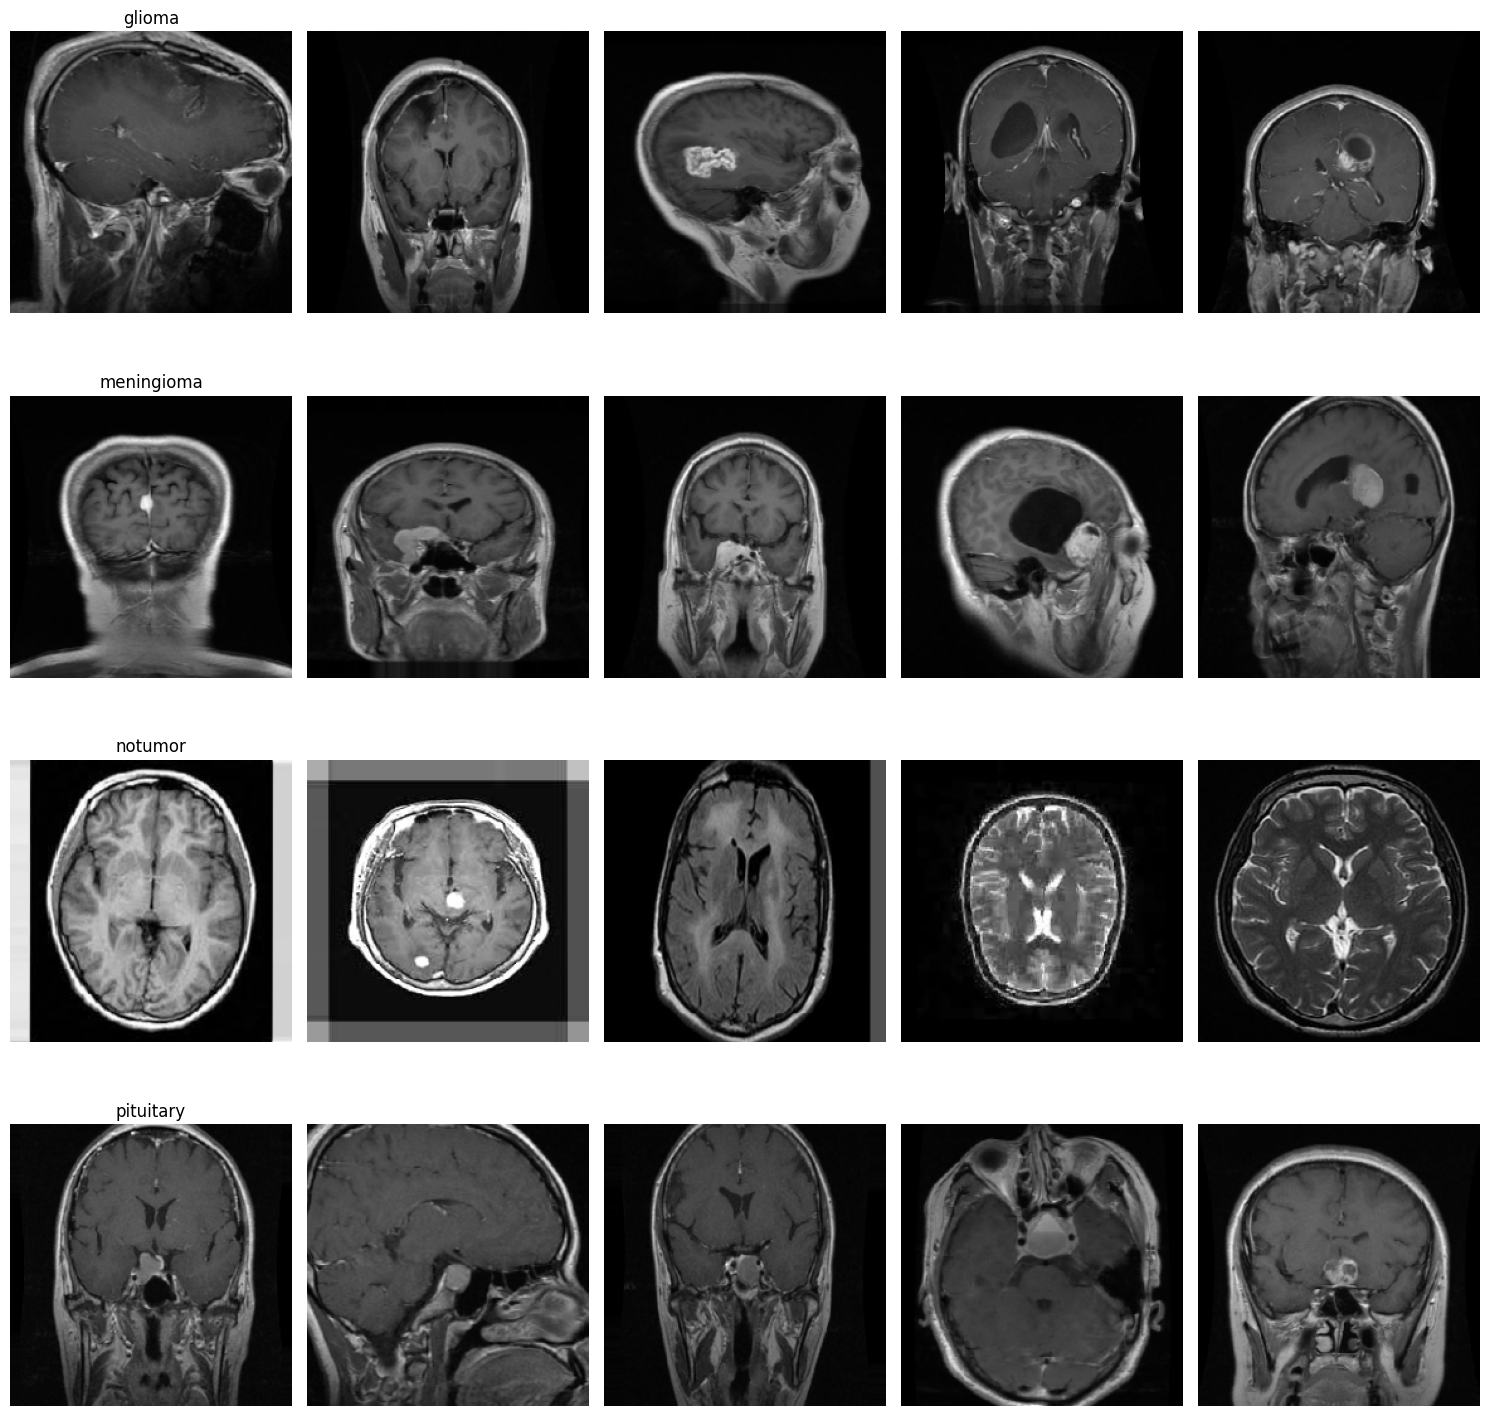

Testing Images:


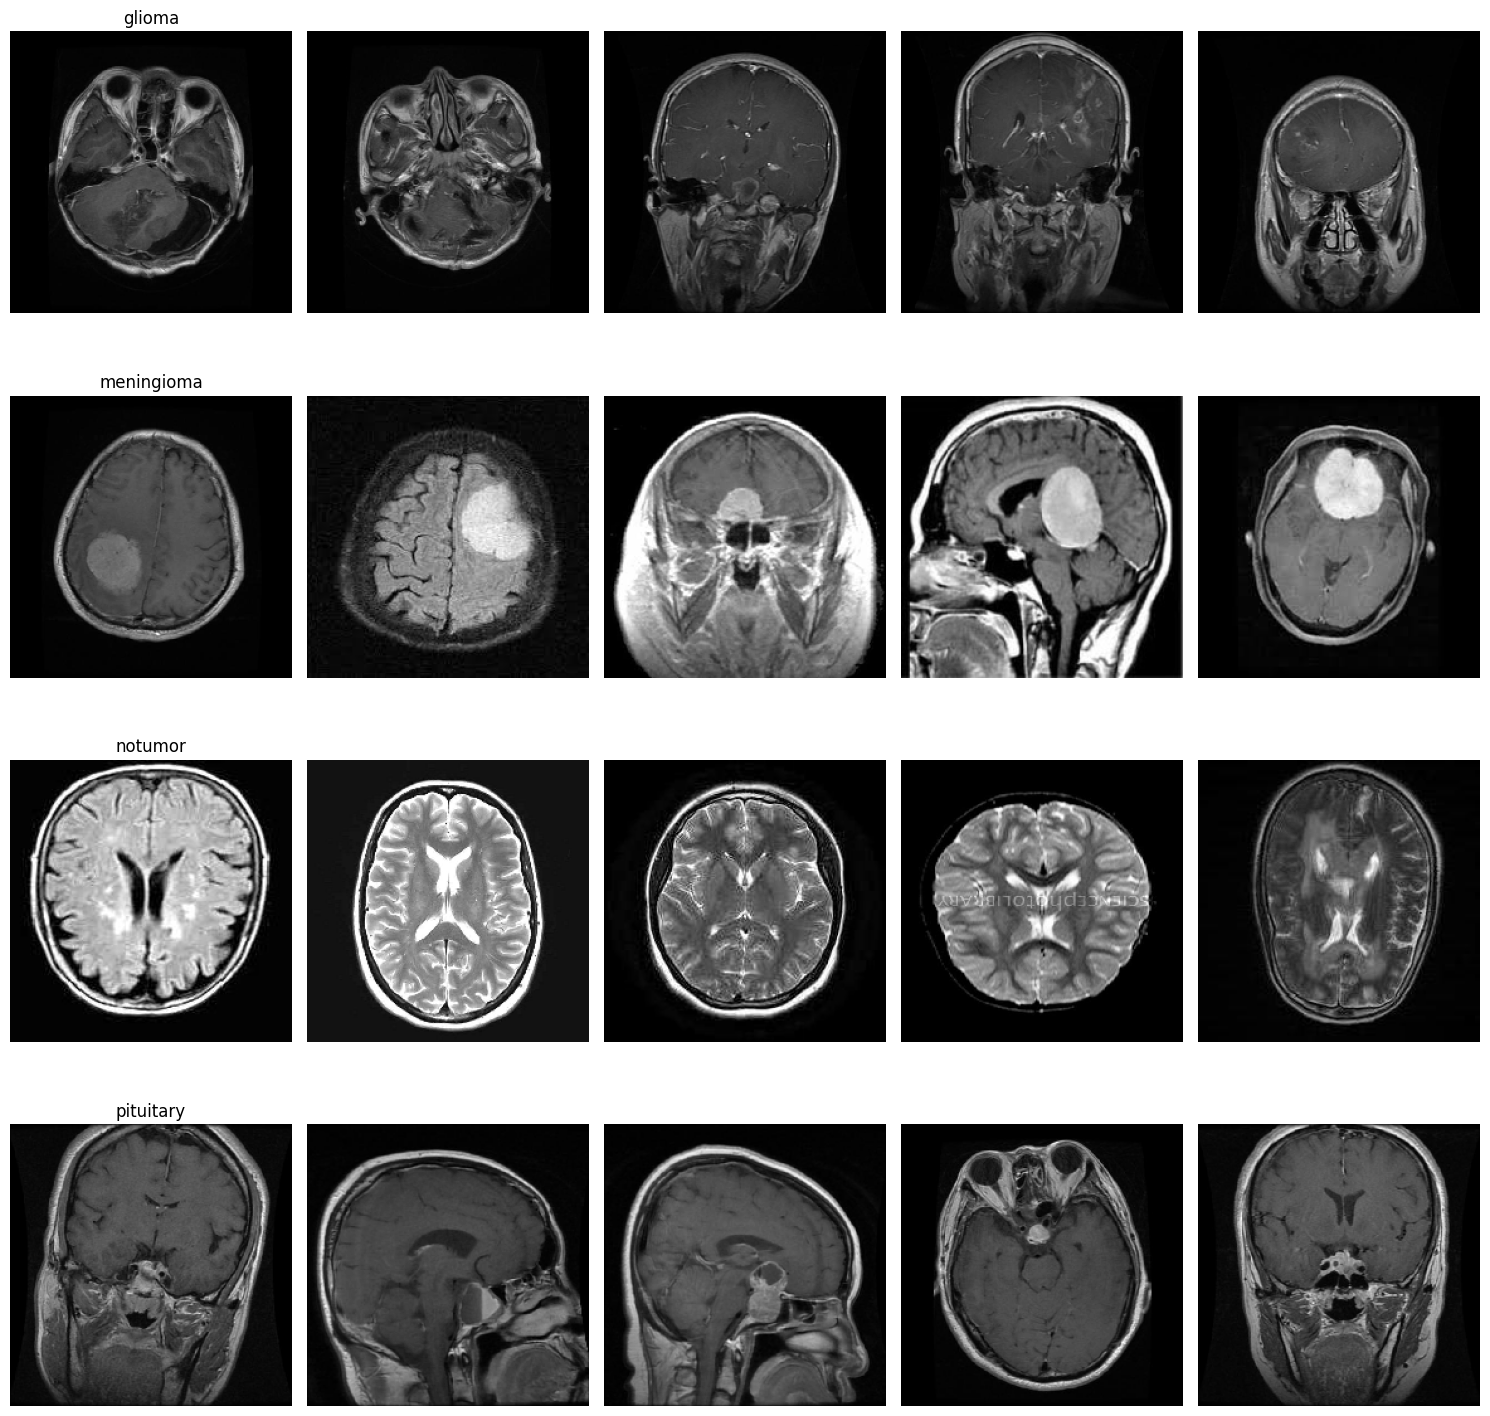

In [ ]:
# Number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Display images from the training generator
print("Training Images:")
display_images_from_generator(train_generator, 4)

# Display images from the testing generator
print("Testing Images:")
display_images_from_generator(test_generator, 4)


In [ ]:
# Get a batch of images from the generator
images, labels = next(train_generator)

# Check the shape of the first image
image_shape = images[0].shape
print(f"Shape of first image: {image_shape}")

# Determine if the image is grayscale or RGB
if len(image_shape) == 3:
    if image_shape[2] == 1:
        print("The images are grayscale (black and white).")
    elif image_shape[2] == 3:
        print("The images are RGB (color).")
else:
    print("Unexpected image shape.")


Shape of first image: (224, 224, 1)
The images are grayscale (black and white).


In [ ]:
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    # It normalizes the outputs of a previous layer by adjusting and scaling activations. This technique helps to stabilize and accelerate the training of deep neural networks
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define a callback to save the model after each epoch
checkpoint = ModelCheckpoint(
    'model_checkpoint.keras',  # Path where the model will be saved
    monitor='val_loss',     # Monitor the validation loss for saving
    save_best_only=True,     # Save only the best model based on validation loss
    mode='min'              # Mode is 'min' because we want to minimize the loss
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs to wait for improvement
    mode='min',
    verbose=1
)
# Train the model with early stopping
history = cnn.fit(
    train_generator,
    epochs=15,
    batch_size=64,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 1288s 14s/step - accuracy: 0.5050 - loss: 7.2779 - val_accuracy: 0.2289 - val_loss: 67.6371
Epoch 2/15
 1/89 ━━━━━━━━━━━━━━━━━━━━ 15:39 11s/step - accuracy: 0.5781 - loss: 0.9469

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5781 - loss: 0.9469 - val_accuracy: 0.2258 - val_loss: 67.7596
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 1148s 13s/step - accuracy: 0.6072 - loss: 0.9932 - val_accuracy: 0.2297 - val_loss: 16.3170
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5156 - loss: 1.2183 - val_accuracy: 0.1935 - val_loss: 20.7957
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 1148s 13s/step - accuracy: 0.6678 - loss: 0.7703 - val_accuracy: 0.2273 - val_loss: 15.0479
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.6250 - loss: 0.7497 - val_accuracy: 0.2903 - val_loss: 12.3887
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 1142s 13s/step - accuracy: 0.7003 - loss: 0.7417 - val_accuracy: 0.4727 - val_loss: 2.3037
Epoch 8/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 185ms/step - accuracy: 0.5312 - loss: 0.9238 - val_accuracy: 0.3226 - val_loss: 3.6137
Epoch 9/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 1198s 13s/step - accuracy: 0.6945 - loss: 0.7892 - val_accuracy: 0.5

21/21 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.7202 - loss: 0.6909
Test accuracy: 0.7407, Test loss: 0.6910


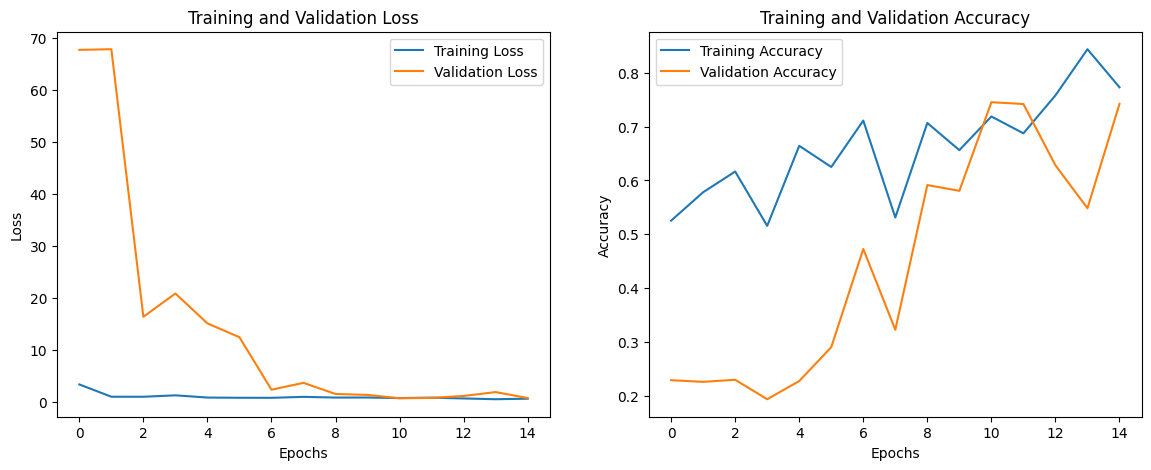

21/21 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step
Training Accuracy: 0.25
Test Accuracy: 0.74


<Figure size 800x600 with 0 Axes>

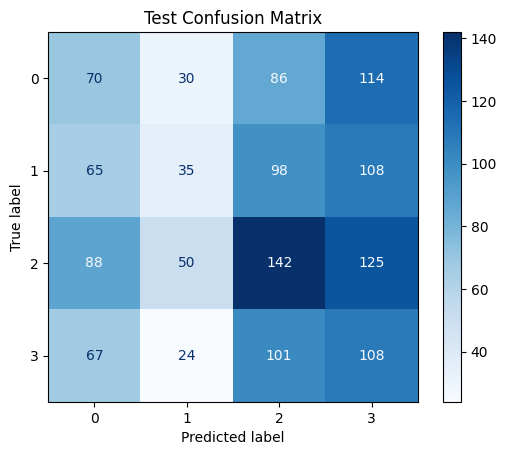

<Figure size 800x600 with 0 Axes>

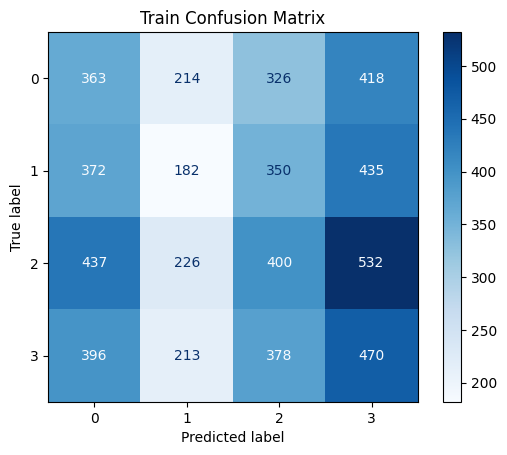

Test accuracy: 0.7406559586524963


In [ ]:
test_loss, test_acc = cnn.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')

# Plotting the training and validation loss and accuracy
plt.figure(figsize=(14, 5))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Making predictions on the test set
y_test_pred = np.argmax(cnn.predict(test_generator), axis=1)
y_test_true = np.concatenate([test_generator[i][1] for i in range(len(test_generator))], axis=0)
# Calculating metrics for the test set
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')
test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')

# Making predictions on the train set
y_train_pred = np.argmax(cnn.predict(train_generator), axis=1)
y_train_true = np.concatenate([train_generator[i][1] for i in range(len(train_generator))], axis=0)
# Calculating metrics for the train set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# Calculate the confusion matrix for the test set
cm_test = confusion_matrix(y_test_true, y_test_pred)
n_classes = 4
# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.arange(n_classes)).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate the confusion matrix for the train set
cm_train = confusion_matrix(y_train_true, y_train_pred)

# Plot the confusion matrix for the train set
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.arange(n_classes)).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(f"Test accuracy: {test_acc}")